# Notebook para o agrupamento pelo algoritmo DBScan

No ano de 1996, Martin Ester, Hans-Peter Kriegel, Jörg Sander e Xiaowei Xu publicaram o artigo intitulado A Density Based Spatial Clustering of Applications With Noise. Nesse artigo foi apresentado o algoritmo DBSCAN, que pode ser aplicado a grandes conjuntos de dados que possuem outliers, ao mesmo tempo em que encontra clusters com diversos formatos com eficiência aceitável. 

O DBSCAN encontra agrupamentos baseando-se na vizinhança dos objetos, onde a densidade associada a um ponto é obtida por meio da contagem do número de pontos vizinhos em uma determinada região ao redor desse ponto [1]. Esse algoritmo possui a capacidade de encontrar clusters considerando as propriedades dos dados, pois não requer que seja informado antecipadamente o número de clusters, permitindo a formação de grupos com formatos arbitrários. Em contrapartida são necessários outros dois parâmetros de entrada para o algoritmo. 
Outras características importantes do algoritmo são a capacidade de identificar outliers, e a possibilidade de poder trabalhar com diversas funções de distância [2]

Os dois parâmetros de entrada que o DBSCAN necessita são:

a) raio de ε-vizinhança de um ponto: determina o raio de vizinhança ε para
cada ponto da base de dados. Dado o parâmetro ε, o algoritmo DBSCAN
verifica a quantidade de pontos contidos no raio ε para cada ponto da base de
dados, e se essa quantidade exceder certo número, um cluster é formado;

b) número mínimo de pontos (η): parâmetro que especifica o número mínimo
de pontos, no dado raio de ε-vizinhança, que um ponto precisa possuir para
ser considerado um ponto central e conseqüentemente, de acordo com as
definições de cluster baseado em densidade, iniciar a formação de um cluster.

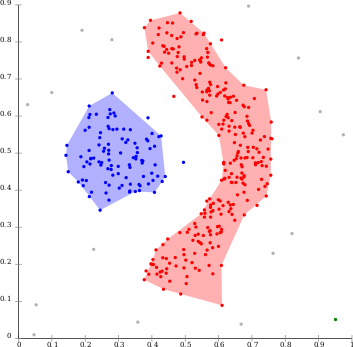

In [2]:
from IPython.display import Image
Image(filename="notebooks_Data_Science/img/dbscan.jpg",width = 600,height = 600)

In [3]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

#CRIAR UM PANDA DATA FRAME
import pandas as pd
from collections import OrderedDict
import pickle

from sklearn import cluster
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [4]:
def salvaDataFrames_csv(dataFrame,caminhoSaida,nomeArquivo):
    dataFrame.to_csv(caminhoSaida+'\/'+nomeArquivo, sep=',', encoding = 'utf-8')
       
def salvaDataFrames_pkl(dataFrame,caminhoSaida,nomeArquivo):
    dataFrame.to_pickle(caminhoSaida+'\/'+nomeArquivo, compression='infer')
    
caminhoDataframe = 'C:\/Users\/Ricardinho\/Desktop\/notebooks_Data_Science\/DataFrames\/' 

def abreDataFrame(caminho,nomeArq):
    dataFrame = pd.read_pickle(caminho + nomeArq)#READ PICKLE MUITO IMPORTANTE!!!!!
    return dataFrame

dataFrame_SN = abreDataFrame(caminhoDataframe, 'Data_Frame_Ia_PCA_II.pkl')
dataFrame_SN.head(5)

,Nome_SN,SNx,SNy,Fase,Tipo,Tag_Fase,PCA_Px_1,PCA_Px_2,PCA_Py_1,PCA_Py_2,PCA_Vx_1,PCA_Vx_2,PCA_Vy_1,PCA_Vy_2
0,SN_Redshifted_sn1998V-19980319.flm,"[3657.8171091445433, 3661.5775067102504, 3665....","[0.5984432965698894, 0.5905492293635906, 0.579...",-1.890,Ia,Maximo,-6458.880203,-655.708442,-0.444330,0.048064,-6280.719189,-396.874182,-0.241119,0.373996
1,SN_Redshifted_sn1998V-19980320.flm,"[3657.8171091445433, 3661.5775067102504, 3665....","[0.637192333491651, 0.6141274942884631, 0.5960...",-1.890,Ia,Maximo,-2137.843934,3937.730133,-0.275439,0.112216,1117.916273,4786.035450,-0.069201,0.484576
2,SN_Redshifted_sn1998V-19980321.flm,"[3657.8171091445433, 3661.546502254467, 3665.2...","[0.6570335303026084, 0.6753503669909301, 0.673...",-0.956,Ia,Maximo,-4579.883496,2143.853840,-0.423004,0.239782,-4128.202144,2893.456010,-0.306284,0.584218
3,SN_Redshifted_sn1998dx-19980914.flm,"[3529.746655280387, 3533.3753907622395, 3537.0...","[0.9510331445835957, 0.8747050414260726, 0.822...",-0.435,Ia,Maximo,3484.079226,4660.968716,-0.412396,0.413321,3706.066803,4403.288462,-0.213103,0.403622
4,SN_Redshifted_sn1998dx-19980915.flm,"[3529.746655280387, 3533.3753907622395, 3537.0...","[0.9336562914191868, 0.8202276475798798, 0.749...",-0.435,Ia,Maximo,3294.567153,4491.130144,-0.331301,0.292613,6098.139925,2879.216191,-0.138856,0.308748


In [5]:
def machine_learning_tag(dataframe):
    
    nome_valor = []
    print(dataframe.loc[0,'Tag_Fase'])
    for i in range(len(dataframe.index)):
        if(dataframe.loc[i,'Tag_Fase'] == 'Inicial'):
            valor = 1
            nome_valor.append(valor)
        elif(dataframe.loc[i,'Tag_Fase'] == 'Pre_Maximo' ):
            valor = 2
            nome_valor.append(valor)
        elif(dataframe.loc[i,'Tag_Fase'] == 'Maximo'):
            valor = 3
            nome_valor.append(valor)
        elif(dataframe.loc[i,'Tag_Fase'] == 'Pos_Maximo'):
            valor = 4
            nome_valor.append(valor)
        elif(dataframe.loc[i,'Tag_Fase'] == 'Pre_Nebular' ):
            valor = 5
            nome_valor.append(valor)
        elif(dataframe.loc[i,'Tag_Fase'] == 'Nebular' ):
            valor = 6
            nome_valor.append(valor)
        else:
            nome_valor.append(0)
                
    dataframe['Tag_valor'] = nome_valor     
    
    return nome_valor

## Computando o DbScan para os valores de PCA de vales e de picos

In [6]:
X = dataFrame_SN[['PCA_Px_1','PCA_Px_2','PCA_Py_1','PCA_Py_2','PCA_Vx_1','PCA_Vx_2','PCA_Vy_1','PCA_Vy_2']]

X = StandardScaler().fit_transform(X)
#labels
y = machine_learning_tag(dataframe=dataFrame_SN)

Maximo


In [7]:
# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(y, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))


Estimated number of clusters: 6
Homogeneity: 0.005
Completeness: 0.037
V-measure: 0.008
Adjusted Rand Index: -0.000
Adjusted Mutual Information: 0.001
Silhouette Coefficient: -0.373


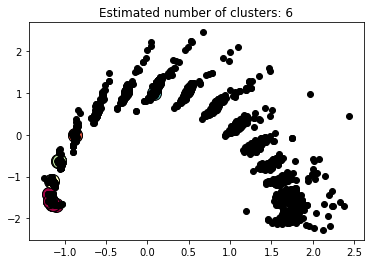

In [9]:
# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

Foram gerados 6 clusters nesta análise e a separação das variaveis apresenta-se melhor do que na plotagem feita para os valores de PCA.

## Computando o DbScan para os valores de PCA de comprimento de onda e de fluxo de radiação

In [10]:
dataFrame_PCA_XY = abreDataFrame(caminhoDataframe, 'Data_Frame_Ia_PCA_XY.pkl')
dataFrame_PCA_XY.head(5)

,Nome_SN,SNx,SNy,Fase,Tipo,Tag_Fase,PCA_SNx_1,PCA_SNx_2,PCA_SNx_3,PCA_SNx_4,PCA_SNy_1,PCA_SNy_2,PCA_SNy_3,PCA_SNy_4
0,SN_Redshifted_sn1998V-19980319.flm,"[3657.8171091445433, 3661.5775067102504, 3665....","[0.5984432965698894, 0.5905492293635906, 0.579...",-1.890,Ia,Maximo,1067.728793,1559.146097,7.421434e-10,-3.382472e-12,-3.989887,-1.327662,-1.906058,1.198017
1,SN_Redshifted_sn1998V-19980320.flm,"[3657.8171091445433, 3661.5775067102504, 3665....","[0.637192333491651, 0.6141274942884631, 0.5960...",-1.890,Ia,Maximo,1067.728793,1559.146097,7.409506e-10,1.220192e-11,-4.102365,-1.263241,-1.900481,1.228636
2,SN_Redshifted_sn1998V-19980321.flm,"[3657.8171091445433, 3661.546502254467, 3665.2...","[0.6570335303026084, 0.6753503669909301, 0.673...",-0.956,Ia,Maximo,503.000753,1591.195877,7.456314e-10,-7.024128e-14,-3.939491,-1.560221,-2.191264,0.987669
3,SN_Redshifted_sn1998dx-19980914.flm,"[3529.746655280387, 3533.3753907622395, 3537.0...","[0.9510331445835957, 0.8747050414260726, 0.822...",-0.435,Ia,Maximo,-4946.086051,-129.305816,7.446961e-10,-1.072000e-12,-4.463030,-1.872636,1.136015,0.552185
4,SN_Redshifted_sn1998dx-19980915.flm,"[3529.746655280387, 3533.3753907622395, 3537.0...","[0.9336562914191868, 0.8202276475798798, 0.749...",-0.435,Ia,Maximo,-4946.086051,-129.305816,7.446961e-10,-1.072000e-12,-3.999763,-0.583957,1.597298,0.534887


In [11]:
X1 = dataFrame_PCA_XY[['PCA_SNx_1','PCA_SNx_2','PCA_SNy_1','PCA_SNy_2']]

X1 = StandardScaler().fit_transform(X1)
#labels
y1 = machine_learning_tag(dataframe=dataFrame_PCA_XY)#dataFrame_PCA_XY[['Tag_Fase']]


Maximo


In [12]:
# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X1)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
print(labels)
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y1, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y1, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y1, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y1, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(y1, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X1, labels))

[ 0  0  0 ...  0 -1 -1]
Estimated number of clusters: 8
Homogeneity: 0.009
Completeness: 0.010
V-measure: 0.009
Adjusted Rand Index: 0.009
Adjusted Mutual Information: 0.004
Silhouette Coefficient: -0.089


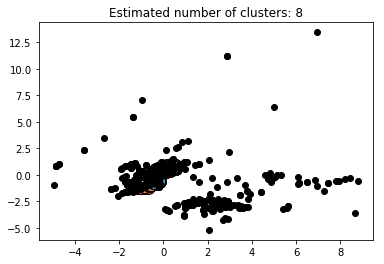

In [13]:
# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
plt.figure()
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X1[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X1[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [15]:
unique_labels

{-1, 0, 1, 2, 3, 4, 5, 6, 7}

### Neste ponto é possivel verificar os agrupamentos relacionados com as caracteriticas dos dados de PCA feitos pelo algoritmo DBScan, existem fortes agrupamentos no centro e nas vizinhanças espectros em grupos menores.

In [16]:
db

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=10, n_jobs=1, p=None)

In [22]:
def gerandoFeatures_DataFrame_DBscan(dataFrame_SN,feature):
    
    '''
    dados basicos que sempre ficam no dataframe
    '''
    data1 = dataFrame_SN.loc[:,'SNx']
    data1 = data1.tolist()
    
    data2 = dataFrame_SN.loc[:,'Nome_SN']
    data2 = data2.tolist()
    
    data3 = dataFrame_SN.loc[:,'SNy']
    data3 = data3.tolist()
    
    data4 = dataFrame_SN.loc[:,'Tipo']
    data4 = data4.tolist()
    
    data5 = dataFrame_SN.loc[:,'Fase']
    data5 = data5.tolist()
    
    data6 = dataFrame_SN.loc[:,'Tag_Fase']
    data6 = data6.tolist()
    
    #gera o 1st data frame
    dataFrameFeatures = OrderedDict(
    {
     'Nome_SN':data2,
     'SNx':data1,
     'SNy':data3,
     'Tipo':data4,
     'Fase':data5,
     'Tag_Fase':data6
     })
    df = pd.DataFrame(dataFrameFeatures)
    #print(feature)
    
    feature = pd.DataFrame(feature, columns = ['Clusters-DBScan'])
   
    dataFrame_Final = pd.concat([df,feature],axis = 1)
    
    return dataFrame_Final

In [23]:
dataFrame_DbScan = gerandoFeatures_DataFrame_DBscan(dataFrame_PCA_XY,db.labels_)

salvaDataFrames_csv(dataFrame_DbScan,caminhoDataframe,'Data_Frame_Ia_DBscan.csv')
salvaDataFrames_pkl(dataFrame_DbScan,caminhoDataframe,'Data_Frame_Ia_DBscan.pkl')

In [24]:
dataFrame_DbScan.head(5)

,Nome_SN,SNx,SNy,Tipo,Fase,Tag_Fase,Clusters-DBScan
0,SN_Redshifted_sn1998V-19980319.flm,"[3657.8171091445433, 3661.5775067102504, 3665....","[0.5984432965698894, 0.5905492293635906, 0.579...",Ia,-1.890,Maximo,0
1,SN_Redshifted_sn1998V-19980320.flm,"[3657.8171091445433, 3661.5775067102504, 3665....","[0.637192333491651, 0.6141274942884631, 0.5960...",Ia,-1.890,Maximo,0
2,SN_Redshifted_sn1998V-19980321.flm,"[3657.8171091445433, 3661.546502254467, 3665.2...","[0.6570335303026084, 0.6753503669909301, 0.673...",Ia,-0.956,Maximo,0
3,SN_Redshifted_sn1998dx-19980914.flm,"[3529.746655280387, 3533.3753907622395, 3537.0...","[0.9510331445835957, 0.8747050414260726, 0.822...",Ia,-0.435,Maximo,-1
4,SN_Redshifted_sn1998dx-19980915.flm,"[3529.746655280387, 3533.3753907622395, 3537.0...","[0.9336562914191868, 0.8202276475798798, 0.749...",Ia,-0.435,Maximo,0


## Análise dos Grupos Formados

In [28]:
def guarda_fases(data_cluster,dataframe):
    data_fase = []
    for i in range(len(data_cluster)):
        data_fase.append(dataframe.loc[data_cluster[i],'Fase'])
    return data_fase

In [27]:
#Verifica a média dos valores de fase para cada grupo
dataCluster_0 = []
dataCluster_1 = []
dataCluster_2 = []
dataCluster_3 = []
dataCluster_4 = []
dataCluster_5 = []
dataCluster_6 = []
dataCluster_7 = []
dataCluster_8 = []

for i in range(len(dataFrame_DbScan.index)):
    if(dataFrame_DbScan.loc[i,'Clusters-DBScan'] == -1):
        dataCluster_0.append(i)
    if(dataFrame_DbScan.loc[i,'Clusters-DBScan'] == 0):
        dataCluster_1.append(i)
    if(dataFrame_DbScan.loc[i,'Clusters-DBScan'] == 1):
        dataCluster_2.append(i)
    if(dataFrame_DbScan.loc[i,'Clusters-DBScan'] == 2):
        dataCluster_3.append(i)    
    if(dataFrame_DbScan.loc[i,'Clusters-DBScan'] == 3):
        dataCluster_4.append(i)
    if(dataFrame_DbScan.loc[i,'Clusters-DBScan'] == 4):
        dataCluster_5.append(i) 
    if(dataFrame_DbScan.loc[i,'Clusters-DBScan'] == 5):
        dataCluster_6.append(i)         
    if(dataFrame_DbScan.loc[i,'Clusters-DBScan'] == 6):
        dataCluster_7.append(i)
    if(dataFrame_DbScan.loc[i,'Clusters-DBScan'] == 7):
        dataCluster_8.append(i)     

### Análise de Fases pelos grupos do DBscan

In [29]:
fases_cluster_0 = guarda_fases(dataCluster_0,dataFrame_DbScan)
fases_cluster_1 = guarda_fases(dataCluster_1,dataFrame_DbScan)
fases_cluster_2 = guarda_fases(dataCluster_2,dataFrame_DbScan)
fases_cluster_3 = guarda_fases(dataCluster_3,dataFrame_DbScan)
fases_cluster_4 = guarda_fases(dataCluster_4,dataFrame_DbScan)
fases_cluster_5 = guarda_fases(dataCluster_5,dataFrame_DbScan)
fases_cluster_6 = guarda_fases(dataCluster_6,dataFrame_DbScan)
fases_cluster_7 = guarda_fases(dataCluster_7,dataFrame_DbScan)
fases_cluster_8 = guarda_fases(dataCluster_8,dataFrame_DbScan)



fase_0 = pd.Series(fases_cluster_0)
fase_1 = pd.Series(fases_cluster_1)
fase_2 = pd.Series(fases_cluster_2)
fase_3 = pd.Series(fases_cluster_3)
fase_4 = pd.Series(fases_cluster_4)
fase_5 = pd.Series(fases_cluster_5)
fase_6 = pd.Series(fases_cluster_6)
fase_7 = pd.Series(fases_cluster_7)
fase_8 = pd.Series(fases_cluster_8)


Current size: [6.0, 4.0]


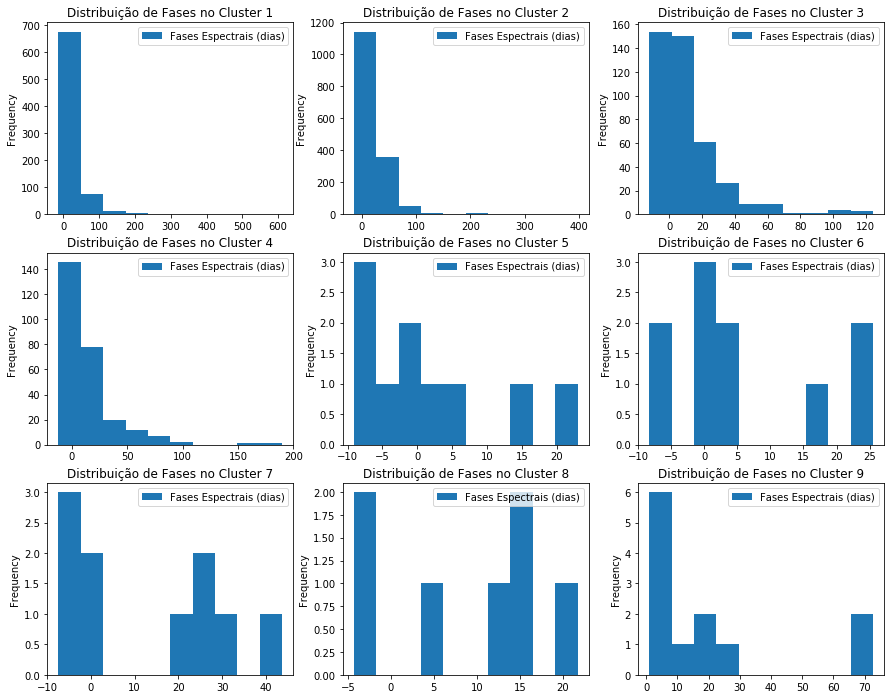

In [30]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 15
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

fig, axes = plt.subplots(nrows=3, ncols=3)
fase_0.plot(ax=axes[0,0],kind='hist',title='Distribuição de Fases no Cluster 1',legend = True,label='Fases Espectrais (dias)')
fase_1.plot(ax=axes[0,1],kind='hist',title='Distribuição de Fases no Cluster 2',legend = True,label='Fases Espectrais (dias)')
fase_2.plot(ax=axes[0,2],kind='hist',title='Distribuição de Fases no Cluster 3',legend = True,label='Fases Espectrais (dias)')
fase_3.plot(ax=axes[1,0],kind='hist',title='Distribuição de Fases no Cluster 4',legend = True,label='Fases Espectrais (dias)')
fase_4.plot(ax=axes[1,1],kind='hist',title='Distribuição de Fases no Cluster 5',legend = True,label='Fases Espectrais (dias)')
fase_5.plot(ax=axes[1,2],kind='hist',title='Distribuição de Fases no Cluster 6',legend = True,label='Fases Espectrais (dias)')
fase_6.plot(ax=axes[2,0],kind='hist',title='Distribuição de Fases no Cluster 7',legend = True,label='Fases Espectrais (dias)')
fase_7.plot(ax=axes[2,1],kind='hist',title='Distribuição de Fases no Cluster 8',legend = True,label='Fases Espectrais (dias)')
fase_8.plot(ax=axes[2,2],kind='hist',title='Distribuição de Fases no Cluster 9',legend = True,label='Fases Espectrais (dias)')




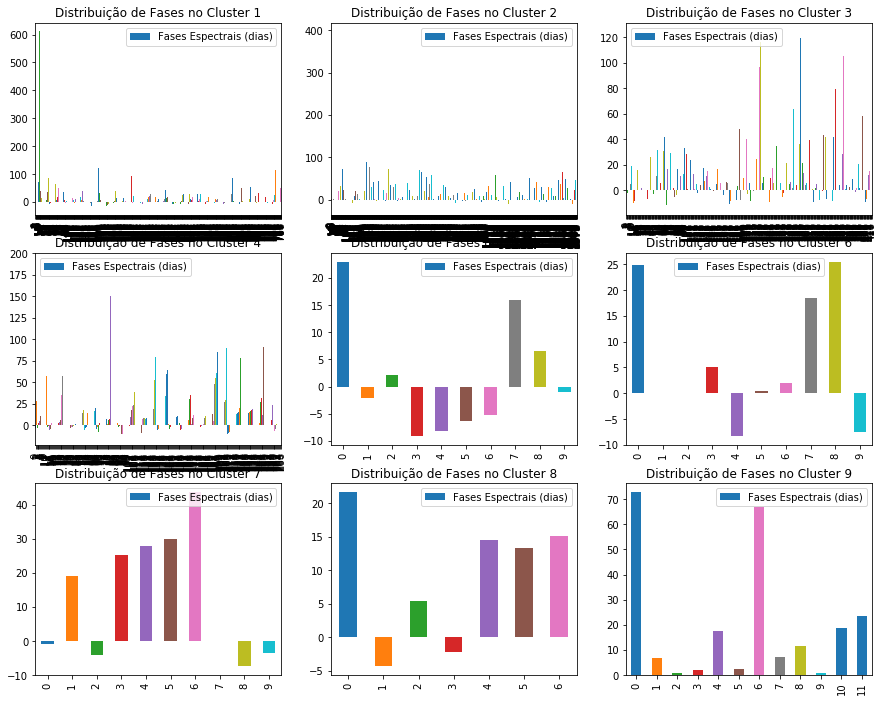

In [31]:
fig, axes = plt.subplots(nrows=3, ncols=3)
fase_0.plot(ax=axes[0,0],kind='bar',title='Distribuição de Fases no Cluster 1',legend = True,label='Fases Espectrais (dias)')
fase_1.plot(ax=axes[0,1],kind='bar',title='Distribuição de Fases no Cluster 2',legend = True,label='Fases Espectrais (dias)')
fase_2.plot(ax=axes[0,2],kind='bar',title='Distribuição de Fases no Cluster 3',legend = True,label='Fases Espectrais (dias)')
fase_3.plot(ax=axes[1,0],kind='bar',title='Distribuição de Fases no Cluster 4',legend = True,label='Fases Espectrais (dias)')
fase_4.plot(ax=axes[1,1],kind='bar',title='Distribuição de Fases no Cluster 5',legend = True,label='Fases Espectrais (dias)')
fase_5.plot(ax=axes[1,2],kind='bar',title='Distribuição de Fases no Cluster 6',legend = True,label='Fases Espectrais (dias)')
fase_6.plot(ax=axes[2,0],kind='bar',title='Distribuição de Fases no Cluster 7',legend = True,label='Fases Espectrais (dias)')
fase_7.plot(ax=axes[2,1],kind='bar',title='Distribuição de Fases no Cluster 8',legend = True,label='Fases Espectrais (dias)')
fase_8.plot(ax=axes[2,2],kind='bar',title='Distribuição de Fases no Cluster 9',legend = True,label='Fases Espectrais (dias)')



Text(0.5,1,'Modelos de Supernova no Cluster 9')

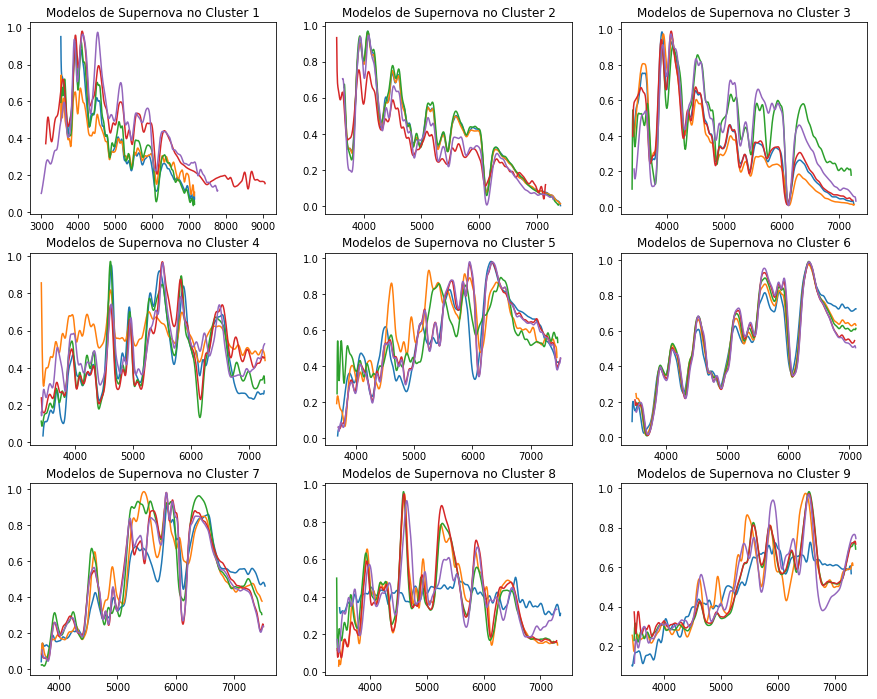

In [34]:
fig, axes = plt.subplots(nrows=3, ncols=3)
for i in range(5):
    axes[0,0].plot(dataFrame_DbScan.loc[dataCluster_0[i],'SNx'],dataFrame_DbScan.loc[dataCluster_0[i],'SNy'])
    axes[0,1].plot(dataFrame_DbScan.loc[dataCluster_1[i],'SNx'],dataFrame_DbScan.loc[dataCluster_1[i],'SNy'])
    axes[0,2].plot(dataFrame_DbScan.loc[dataCluster_2[i],'SNx'],dataFrame_DbScan.loc[dataCluster_2[i],'SNy'])
    axes[1,0].plot(dataFrame_DbScan.loc[dataCluster_3[i],'SNx'],dataFrame_DbScan.loc[dataCluster_3[i],'SNy'])
    axes[1,1].plot(dataFrame_DbScan.loc[dataCluster_4[i],'SNx'],dataFrame_DbScan.loc[dataCluster_4[i],'SNy'])
    axes[1,2].plot(dataFrame_DbScan.loc[dataCluster_5[i],'SNx'],dataFrame_DbScan.loc[dataCluster_5[i],'SNy'])
    axes[2,0].plot(dataFrame_DbScan.loc[dataCluster_6[i],'SNx'],dataFrame_DbScan.loc[dataCluster_6[i],'SNy'])
    axes[2,1].plot(dataFrame_DbScan.loc[dataCluster_7[i],'SNx'],dataFrame_DbScan.loc[dataCluster_7[i],'SNy'])
    axes[2,2].plot(dataFrame_DbScan.loc[dataCluster_8[i],'SNx'],dataFrame_DbScan.loc[dataCluster_8[i],'SNy'])
    
axes[0,0].set_title('Modelos de Supernova no Cluster 1')
axes[0,1].set_title('Modelos de Supernova no Cluster 2')
axes[0,2].set_title('Modelos de Supernova no Cluster 3')
axes[1,0].set_title('Modelos de Supernova no Cluster 4')
axes[1,1].set_title('Modelos de Supernova no Cluster 5')
axes[1,2].set_title('Modelos de Supernova no Cluster 6')
axes[2,0].set_title('Modelos de Supernova no Cluster 7')
axes[2,1].set_title('Modelos de Supernova no Cluster 8')
axes[2,2].set_title('Modelos de Supernova no Cluster 9')

### O agrupamento pelo Dbscan possui um desempenho superior ao algoritmo de agrupamento K-means. O agrupamento pelo DbScan gerou grupos melhores e desta forma é possivel identificar os perfis para cada uma das fases de supernovas do periodo inicial ao periodo de fase nebular.

## Referencias

[1] ERTÖZ, Levent; STEINBACH, Michael; KUMAR, Vipin. Finding Cluster of Diferent
Sizes, Shapes, and Densities in Noisy, High Dimensional Data. In Proceedings of Second
SIAM International Conference on Data Mining, Arlington, 2003.

[2] ANKERST, Mihael; BREUNIG, Markus M.; KRIEGEL, Hans-Peter; SANDER,Jörg.
OPTICS: Ordering Points To Identify the Clustering Structure. In Proc. ACM
SIGMOD’99 Int. Conf. on Management of Data (SIGMOD’99), pages 49-60,
Philadelphia, 1999